## Support Vector Machine:

It has capability to perform classification and regression both on linear and non linear dataset. It is also useful to detect outliers. SVM is well suited for complex classification but for small or medium size dataset.

## Linear Support Vector Classification:


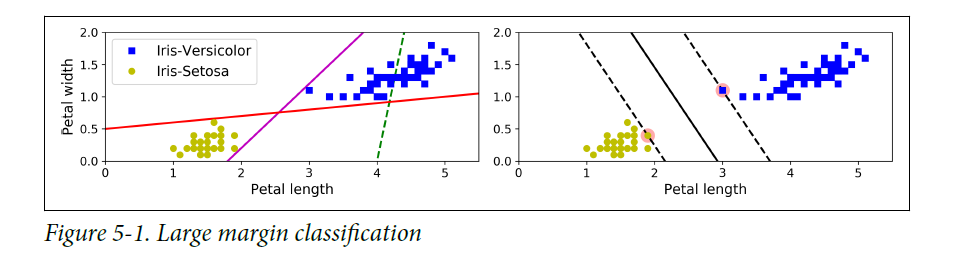

Refer fig 5.1

left graph of Fig 5.1 on show that data is linearly seperable.
if we see dashed line we can observe that it is bad classifier as it does not even seperated two classes properly.

if we see pink and orange solid like we can see that data is seperated properly but it will not able to classify if new instance will come close line/decision boundary line.

Right graph Solid line represent decision boundary of SVM classifier this line does not only seperated two classes but also it is trying to stay away as far as between classes. We can think of SVM classifier as fitting the widest possible street( street represented by dashed lines.)

Notice that adding more new training instances will not affect the decision boundary at all: It is fully determined or supported by the instances located on the edge of the street. These instances are called support vectors.(They are ceicled in fig 5.1)





## SVM is sensitive to feature scales

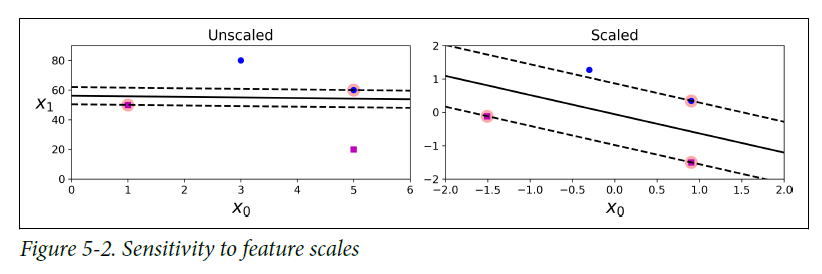

Figure 5-2 left graph depict that x1 has highscale as compare to x0. which lead  widest possible street parallel to x0. 

If we observe right figure we can see that after converting both feature to same scale SVM draws more accurate decision boundary. 

Hence SVM is sensitive to feature scales. we should always perform scaling on our inputs features.

## Soft Margin Classification:

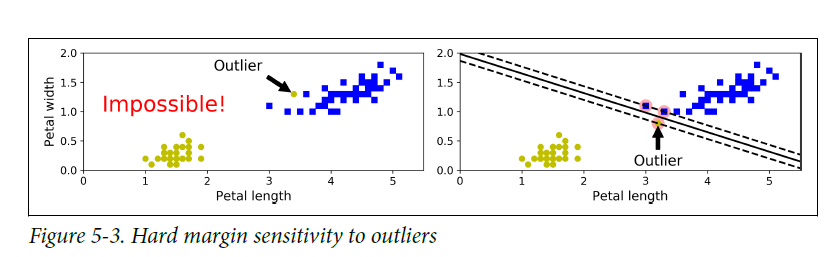


If we strictly impose all instances off the steet and on right side, this is called hard margin. There is two main issue with hard margin classification.

1. It only work if data is linearly seperable.
2. It is quite sensitive to outlier.

Just with one outlier it is difficult to find hard margin and on the right decision boundary ends up very different from the one we saw earlier in fig 5.1 wihout outlier. it will probably not generalize as well.

### Soft margin classification: 
To resolve the issue encountered in "Hard margin classfication", we should use a more flexible model. The objective is to find a good balance between keeping street as large as possible and limiting margin violations. This is called soft margin classification.

Margin Violations: instances that end up in the middle of the street or even on the wrong side.

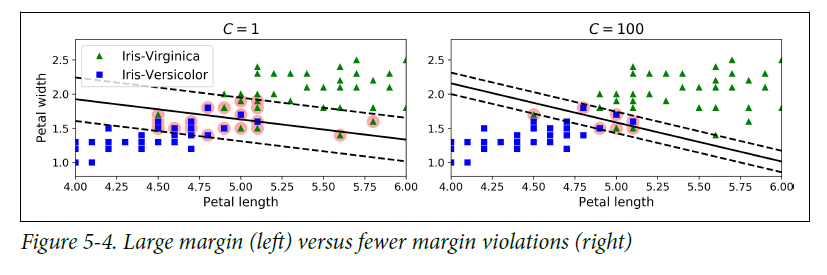

In Scikit-Learn's, SVM classes we can control the balance by using hyperparameter C.
Fig 5.4 depict that if c value is less then we wll get widest street 
and C value is high if we will get a narrower street.

but if we keep C value to minimum it will leads to huge margin voilation as we will increase value of c it will decrease the margin voilation.

even left fig show high margin voilation but if we see closely its instances still classfied correctly as per decision boundry so we can use left model with c value =1

if SVM is overfitting we try regulazing it by reducing value of c

We will demonstrate fig 5.4 left side graph using SKlearn implementation

In [5]:
# importing dataset
from sklearn import datasets

In [6]:
iris=datasets.load_iris() #loading iris dataset

In [103]:
import matplotlib.pyplot as plt

In [102]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
# we will select petal length and petal width

In [17]:
X=iris.data[:,2:]
X[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [19]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [22]:
# we will train a linar SVM model(using the LinearSVC class with value c=1 and hinge loss)
# to identify Iris-Virginica flower

y=(iris.target==2).astype(np.float64)

# (iris.target==2) will return true and false list as per condition satisfied and we are type 
# casting the true false to float 64 which will convert true false to 0. and 1.

In [24]:
svm_clf=Pipeline([("scaler",StandardScaler()),
                   ("linear_svc",LinearSVC(C=1,loss="hinge")),
                  
                 ])

In [25]:
svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [27]:
svm_clf.predict([[5.5,1.7]])

# Unlike Logistic Regression classification SVM classifiers do not output probabilites for each class

array([1.])

Alternatively, we could use SVC class, using SVC(kernal="linear",C=1), but it is much slower, especially with large training sets, so it is not recommended. Another option to use SGD classifier class, with SGDClassifier(loss="hinge",alpha=1/(m*C)). This applies regular SGD train a linear SVM classifier.It does not converge as fast as the LinearSVC class, but it
can be useful to handle huge datasets that do not fit in memory (out-of-core training),
or to handle online classification tasks.

## Nonlinear SVM Classification

LinearSVM works surprisingly will in many cases where training instances are linearly seperable to appropriate classes.

Most of the real world problem does not allow us to linearly seperate training instances.
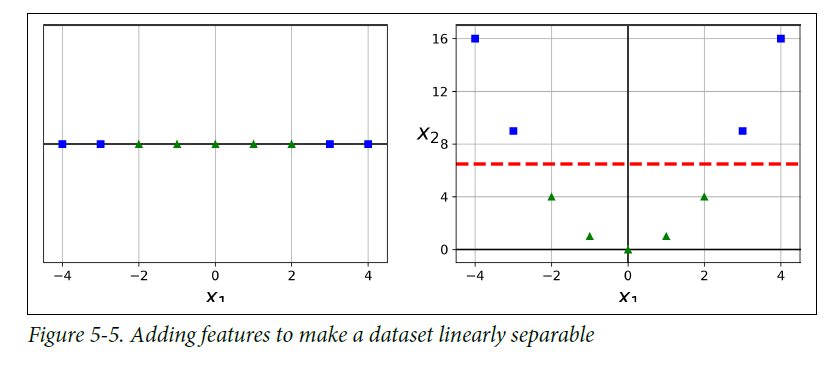


Fig 5.5 left graph shows that it is impossible to seperate data linearly.

One way to seperate data linearly is to add more feature.
We can transform our data to high dimension it may allow us to seprate our data linearly.

eg: see fig 5.5 right graph. we have generated second feature x<sub>2</sub>=x<sub>1</sub><sup>2</sup>

and now we can seperate data linearly.

To impelement this idea Sklearn we can use PolynomialFeature class from preprocessing library. 

We will create a pipeline we perform below steps sequentially:

1. It will peform Polynomial transformation on our dataset (Convert our data to higher dimension)

2. We will apply StandardScaler class which transform our dataset mean to 0 and standard deviation to 1.

3. We will train our model using LinearSVM with C=10 and loss="hinge"

We will perform all above mention steps on moon dataset

#### Note: LinearSVM regularizes bias term so you should center you traning set first by subtracting it's mean which is done by StandardScaler

In [52]:
X,y=datasets.make_moons()

In [54]:
y

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [56]:
import seaborn as sns

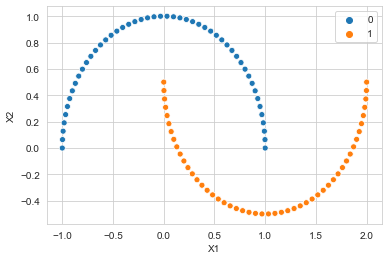

In [66]:
sns.set_style("whitegrid")
sns.scatterplot(X[:,0],X[:,1],hue=y,)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


In [67]:
from sklearn.preprocessing import PolynomialFeatures

In [71]:
polynomial_svm_clf=Pipeline([('poly',PolynomialFeatures(degree=3)),
                            ('StandardScaler_data',StandardScaler()),
                             ('linear_svm',LinearSVC(C=10,loss="hinge",max_iter=10000))
                            ])

In [72]:
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('StandardScaler_data', StandardScaler()),
                ('linear_svm', LinearSVC(C=10, loss='hinge', max_iter=10000))])

## we will set hue parameter from predicted value we will see is our model able to classify points correcly

In [76]:
yhat=polynomial_svm_clf.predict(X)

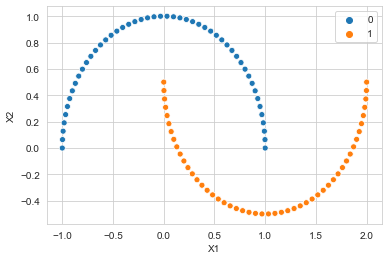

In [77]:
sns.set_style("whitegrid")
sns.scatterplot(X[:,0],X[:,1],hue=yhat,)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


#### Conclusion: yes our model classified every point successfully.

## Polynomial Kernel:

Adding polynomial features is simple to implement can work great with almost all machine learning algorithm.

but at low polynomila degree it is not possible to represent complex relation. With higher polynomial degree we can show complex relation but applying higher polynomial increase the number of feature which eventually slow down process of training model.

Fortunately, when using SVMs we can apply an almost miraculous mathematical technique called kernal trick. It makes it possible getsame result as if you added many polynomial features, even with very high degree polynomials, without actually having to add tghem. So there is no combinatorial explosion of numbers of features since you haven't actually add any features.

Let's implement same example which did above but with help of kernal trick

In [78]:
from sklearn.svm import SVC

In [79]:
poly_kernal_svm_clf=Pipeline([('scale',StandardScaler()),
                             
                             ('svm_clf',SVC(kernel='poly',degree=3,coef0=1,C=5))
                             ])

In [80]:
poly_kernal_svm_clf.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

The hyperparameter coef0 controls how much the model is influenced by highdegree
polynomials versus low-degree polynomials.

It is useful when we use kernal value to sigmoid or poly

In [81]:
yhat_kernal=poly_kernal_svm_clf.predict(X)

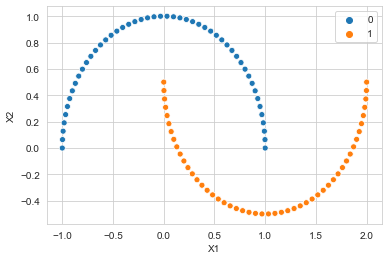

In [82]:
sns.set_style("whitegrid")
sns.scatterplot(X[:,0],X[:,1],hue=yhat_kernal,)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


In [83]:
## This also did the greate job

In [84]:
from sklearn.metrics import confusion_matrix

In [85]:
confusion_matrix(y,yhat_kernal)

array([[50,  0],
       [ 0, 50]], dtype=int64)

In [87]:
from sklearn.metrics import PrecisionRecallDisplay,precision_score,recall_score

In [95]:
precision_score(y,yhat_kernal)

1.0

In [99]:
from mlxtend.plotting import plot_decision_regions

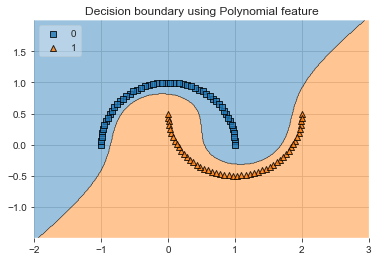

In [104]:
plt.title("Decision boundary using Polynomial feature")
plot_decision_regions(X=X, 
                      y=yhat,
                      clf=poly_kernal_svm_clf, 
                      legend=2)

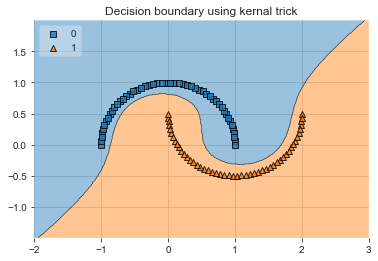

In [105]:
plt.title("Decision boundary using kernal trick")
plot_decision_regions(X=X, 
                      y=yhat_kernal,
                      clf=poly_kernal_svm_clf, 
                      legend=2)

## Adding Similarity Features:

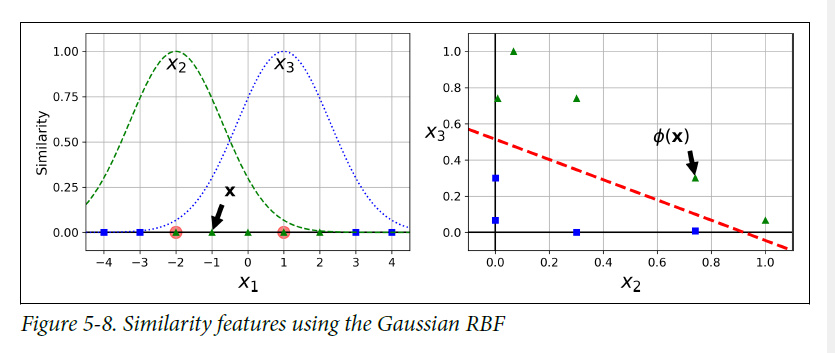